## **Aufgabe 1 - Wärmeleitung in einer Schiene**

Die Differentialgleichungen zur Beschreibung der Wärmeleitung in festen Körpern haben Sie in der Vorlesung kennengelernt und sollen im Folgenden angewendet werden. Dazu wird eine Schiene untersucht, welche vereinfacht als eindimensionaler halbunendlich ausgedehnter Körper betrachtet werden kann, siehe folgende Abbildung:

![alt text](Abbildungen/Halbunendlicher_Koerper.png)

Die Temperaturverteilung in diesem Körper kann über die Fourier'sche Differentialgleichung beschrieben werden:

$$ \dfrac{\partial T}{\partial t} = a \dfrac{\partial^2 T}{\partial x^2} $$

mit der Temperatur $T$, Zeit $t$, der $x$-Koordinate als Ort, sowie der Temperaturleitfähigkeit $a$. Die Stoff- und Geometrieparameter lauten wie folgt:
 - Länge der Schiene: $L = 1\,\text{m}$
 - Wärmeleitfähigkeit: $\lambda = 50\,\text{W/(m K)}$
 - Spezifische Wärmekapazität: $c = 507\,\text{J/(kg K)}$
 - Dichte der Schiene: $\rho = 7850\,\text{kg/m}^3$

Die Temperaturleitfähigkeit $a$ kann aus diesen Stoffwerten wie folgt berechnet werden:

$$ a = \dfrac{\lambda}{\rho c} $$

Für den Fall eines Temperatursprungs am linken Rand $T_S$, einer Starttemperatur $T_0$ und einer konstanten Temperatur am gegenüberliegenden Rand kann die Fourier'sche Differentialgleichung analytisch bestimmt werden:

$$ T(x) = T_S + (T_0 - T_S) \cdot \text{erf} \left( \dfrac{x}{\sqrt{4 a t}} \right) $$

wobei $\text{erf}$ für das Gauß'sche Fehlerintegral steht. Dieses kann mit Hilfe der Funktion [`scipy.special.erf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.erf.html) berechnet werden.


### **Teilaufgaben**

1. Diskretisierten Sie die Fourier'sche Differentialgleichung mit Vorwärtsdifferenz in Zeit (1. Ordnung) und dem zentralen Differenzenschema im Ort (2. Ordnung). Stellen Sie die diskretisierte Gleichung im Jupyter Notebook dar.
2. Unterteilen Sie die Schiene in 10 Stützstellen und weisen Sie allen Knoten die Anfangstemperatur $T_0 = 293{,}15\,\text{K}$ zu. Zum Zeitpunkt $t = 0\,\text{s}$ springt die Temperatur am Anfang der Schiene auf $T(x=0) = T_S = 393{,}15\,\text{K}$ und behält diese bei. Am anderen Ende der Schiene bleibt die Temperatur unverändert auf dem Anfangsniveau $T(x=L) = T_0$.
3. Implementieren Sie die diskretisierte Differentialgleichung und berechnen Sie mit ihrer Hilfe die Temperaturverteilung in der Schiene zu den Zeitpunkten $t = [5\,\text{min}, 15\,\text{min}, 30\,\text{min}]$. Nutzen Sie zur Diskretisierung eine konstante Zeitschrittweite von $\Delta t = 1\,\text{s}$.
4. Vergleichen Sie die numerisch berechneten Temperaturverläufe mit der exakten, analytischen Lösung für die drei Zeitpunkte aus Teilaufgabe 3. Stellen Sie dazu alle Temperaturverläufe in einem Diagramm gegenüber.
5. Verfeinern Sie die örtliche Diskretisierung der Schiene von 10 auf 20 Stützstellen. Wiederholen Sie die Berechnung von Teilaufgabe 3 für den Zeitpunkt $t = 15\,\text{min}$. Welchen Einfluss hat die Erhöhung der örtlichen Auflösung auf den numerischen Fehler im Vergleich mit der exakten, analytischen Lösung? Stellen Sie dazu beide numerisch berechneten Temperaturverläufe bei $t = 15\,\text{min}$ (für 10 und 20 Stützstellen) sowie die analytische Lösung in einem Diagramm gegenüber.

### **Hinweis**

Idealisiert kann dieses Problem als eindimensionaler halbunendlich ausgedehnter Körper betrachtet werden, worauf auch die analytische Lösung beruht. Allerdings ist es nicht möglich, eine halbunendlich lange Schiene numerisch zu berechnen. Daher gehen wir in dieser Aufgabe davon aus, dass die diskretisierte Schiene nur eine Länge von $1\,\text{m}$ hat und sich die Temperaturänderung nach $30\,\text{min}$ noch nicht bis ans Ende der Schiene ausgebreitet hat.

## =================================================================================

## Vollständiger Code

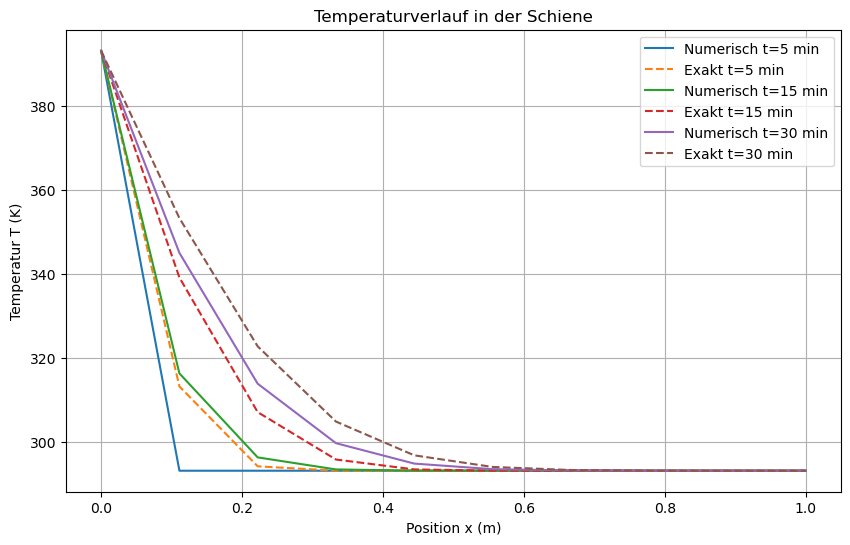

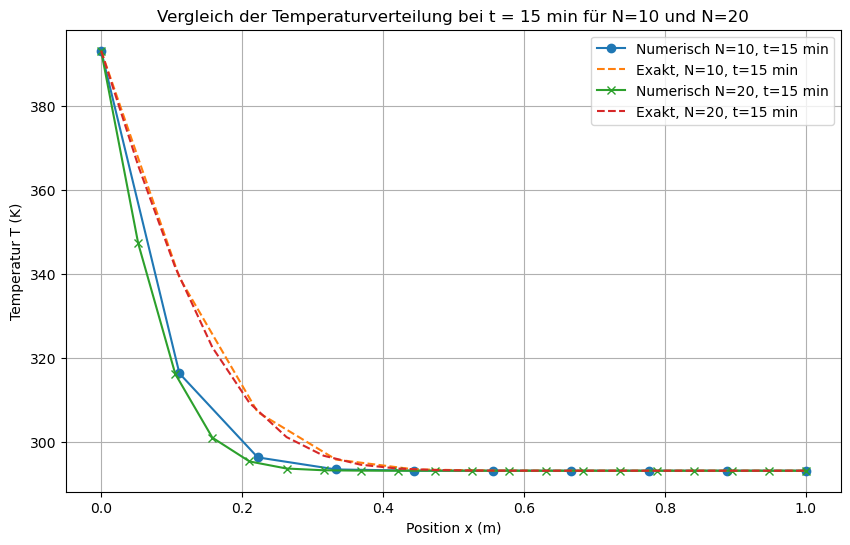

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf


# Gegebene Parameter
L = 1.0  # Länge der Schiene in m
lambda_ = 50  # Wärmeleitfähigkeit in W/(m K)
c = 507  # Spezifische Wärmekapazität in J/(kg K)
rho = 7850  # Dichte in kg/m^3
T_0 = 293.15  # Anfangstemperatur in K
T_S = 393.15  # Temperatur am linken Rand in K


# Berechnung der Temperaturleitfähigkeit 'a'
a = lambda_ / (rho * c)


# Funktion zur Berechnung der numerischen Lösung
def numerische_lösung(N, L, T, a, dt, time_steps):
    dx = L / (N-1)  # Schrittweite im Raum
    r = a * dt / (dx**2)  # Stabilitätsfaktor

    # Zeitentwicklungen
    T_all = [T.copy()]  # Anfangszustand speichern
    for t in time_steps:
        num_steps = t // dt  # Anzahl der Schritte für diese Zeit
        for _ in range(int(num_steps)):
            T_new = T.copy()
            for i in range(1, N-1):  # Randpunkte bleiben unverändert
                T_new[i] = T[i] + r * (T[i+1] - 2*T[i] + T[i-1])
            T = T_new.copy()
        T_all.append(T)
    
    return T_all


# Berechnung der exakten Lösung
def exakte_lösung(L_x, time_steps, a, T_S, T_0):
    T_exact = []
    for t in time_steps:
        T_exact.append(T_S + (T_0 - T_S) * erf(L_x / (2 * np.sqrt(a * t))))
    return T_exact


# Diskretisierung
N = 10  # Anzahl der Stützstellen
L_x = np.linspace(0, L, N)

# Initiale Temperaturverteilung
T = np.full(N, T_0)
T[0] = T_S

# Zeitschritt und maximale Zeit
dt = 1  # Zeitschritt in Sekunden
time_steps = [300, 900, 1800]  # Zeiten in Sekunden (5 min, 15 min, 30 min)


# Numerische Lösung berechnen
T_num = numerische_lösung(N, L, T, a, dt, time_steps)

# Exakte Lösung berechnen
T_exact = exakte_lösung(L_x, time_steps, a, T_S, T_0)


# Diagramm für den Vergleich
plt.figure(figsize=(10, 6))
for index, zeit in enumerate(time_steps):
    plt.plot(L_x, T_num[index], label=f'Numerisch t={zeit//60} min')
    plt.plot(L_x, T_exact[index], '--', label=f'Exakt t={zeit//60} min')

plt.xlabel('Position x (m)')
plt.ylabel('Temperatur T (K)')
plt.title('Temperaturverlauf in der Schiene')
plt.legend()
plt.grid(True)
plt.show()


# Verfeinerte Diskretisierung mit N=20 Stützstellen
N_fine = 20  # Neue Anzahl der Stützstellen
L_x_fine = np.linspace(0, L, N_fine)

# Initiale Temperaturverteilung für feine Diskretisierung
T_fine = np.full(N_fine, T_0)
T_fine[0] = T_S
# Berechnung der numerischen Lösung für N=20 Stützstellen bei t=15 min (900 s)
#T_num_fine = numerische_lösung(N_fine, L, T_fine, a, dt, [900])[1]  # Nur für t=900 s
T_num_fine = numerische_lösung(N_fine, L, T_fine, a, dt, time_steps)
# Exakte Lösung für t=15 min (900 s) auf beiden Diskretisierungen
T_exact_900s = T_S + (T_0 - T_S) * erf(L_x / (2 * np.sqrt(a * 900)))
T_exact_fine_900s = T_S + (T_0 - T_S) * erf(L_x_fine / (2 * np.sqrt(a * 900)))


# Plot: Vergleich der numerischen und exakten Lösungen für beide Diskretisierungen
plt.figure(figsize=(10, 6))
plt.plot(L_x, T_num[1], 'o-', label='Numerisch N=10, t=15 min')        # Numerische Lösung für N=10
plt.plot(L_x, T_exact_900s, '--', label='Exakt, N=10, t=15 min')       # Exakte Lösung auf N=10 Diskretisierung
plt.plot(L_x_fine, T_num_fine[1], 'x-', label='Numerisch N=20, t=15 min')  # Numerische Lösung für N=20
plt.plot(L_x_fine, T_exact_fine_900s, '--', label='Exakt, N=20, t=15 min')  # Exakte Lösung auf N=20 Diskretisierung

# Diagramm-Details
plt.xlabel('Position x (m)')
plt.ylabel('Temperatur T (K)')
plt.title('Vergleich der Temperaturverteilung bei t = 15 min für N=10 und N=20')
plt.legend()
plt.grid(True)
plt.show()

## Trennung und schrittweise Erläuterung des Codes.

### 1. Import der notwendigen Bibliotheken

Zu Beginn des Codes werden die folgenden Bibliotheken importiert:

- **NumPy**: Wird für numerische Berechnungen verwendet, insbesondere für die Erstellung von Arrays und mathematische Funktionen.
- **Matplotlib**: Wird verwendet, um Diagramme zu erstellen und die Ergebnisse visuell darzustellen.
- **SciPy (erf)**: Die Funktion `erf` aus der SciPy-Bibliothek wird zur Berechnung der exakten Lösung der Wärmeleitungsgleichung verwendet, die auf der Fehlerfunktion basiert.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

### 2. Definition der gegebenen Parameter

Im folgenden Codeabschnitt werden alle physikalischen Parameter definiert, die in der Berechnung der Temperaturverteilung verwendet werden:

- **L**: Länge der Schiene in Metern (1.0 m).
- **lambda_**: Wärmeleitfähigkeit in W/(m·K) (50 W/(m·K)).
- **c**: Spezifische Wärmekapazität in J/(kg·K) (507 J/(kg·K)).
- **rho**: Dichte in kg/m³ (7850 kg/m³).
- **T_0**: Anfangstemperatur in Kelvin (293.15 K).
- **T_S**: Temperatur am linken Rand in Kelvin (393.15 K).

In [25]:
# Gegebene Parameter
L = 1.0  # Länge der Schiene in m
lambda_ = 50  # Wärmeleitfähigkeit in W/(m K)
c = 507  # Spezifische Wärmekapazität in J/(kg K)
rho = 7850  # Dichte in kg/m^3
T_0 = 293.15  # Anfangstemperatur in K
T_S = 393.15  # Temperatur am linken Rand in K

### 3. Berechnung der Temperaturleitfähigkeit

Die Temperaturleitfähigkeit `a` wird mit der folgenden Formel berechnet:

$$ a = \dfrac{\lambda}{\rho c} $$

Diese Größe beschreibt die Geschwindigkeit der Wärmeausbreitung und ist notwendig für die Berechnungen der Temperaturverteilung.

In [26]:
# Berechnung der Temperaturleitfähigkeit 'a'
a = lambda_ / (rho * c)

### 4. Numerische Lösung der Wärmeleitungsgleichung

Die Funktion `numerical_solution()` berechnet den Temperaturverlauf an verschiedenen Zeitpunkten unter Verwendung des expliziten Finite-Differenzen-Verfahrens. Hierbei wird die Raumdifferenzierung und die Zeitdifferenzierung in iterativen Schritten durchgeführt.

Die Eingabeparameter sind:

- **N**: Anzahl der Stützstellen.
- **L**: Länge der Schiene.
- **T**: Anfangstemperaturverteilung.
- **a**: Temperaturleitfähigkeit.
- **dt**: Zeitschrittgröße.
- **time_steps**: Liste der zu berechnenden Zeitpunkte.

In [27]:
# Funktion zur Berechnung der numerischen Lösung
def numerische_lösung(N, L, T, a, dt, time_steps):
    dx = L / (N-1)  # Schrittweite im Raum
    r = a * dt / (dx**2)  # Stabilitätsfaktor

    # Zeitentwicklungen
    T_all = [T.copy()]  # Anfangszustand speichern
    for t in time_steps:
        num_steps = t // dt  # Anzahl der Schritte für diese Zeit
        for _ in range(int(num_steps)):
            T_new = T.copy()
            for i in range(1, N-1):  # Randpunkte bleiben unverändert
                T_new[i] = T[i] + r * (T[i+1] - 2*T[i] + T[i-1])
            T = T_new.copy()
        T_all.append(T)
    
    return T_all

### 5. Berechnung der exakten Lösung

Die Funktion `exact_solution()` berechnet die exakte Temperaturverteilung zu den angegebenen Zeitpunkten und unter idealisierten Bedingungen. Sie verwendet die Gauß'schen Fehlerfunktion (erf), um die Lösung der Wärmeleitungsgleichung analytisch zu berechnen.

Die exakte Lösung lautet:


$$ T(x,t) = T_S + (T_0 - T_S) \cdot \text{erf}\left(\frac{x}{2 \sqrt{a t}}\right) $$


In [28]:
# Berechnung der exakten Lösung
def exakte_lösung(L_x, time_steps, a, T_S, T_0):
    T_exact = []
    for t in time_steps:
        T_exact.append(T_S + (T_0 - T_S) * erf(L_x / (2 * np.sqrt(a * t))))
    return T_exact

### 6. Diskretisierung und Zeitpunkte

Die Schiene wird in **N = 10** Punkte unterteilt, und die Temperaturverteilung wird für **3 Zeitpunkte** (300s, 900s und 1800s) berechnet. Die Temperatur am linken Rand wird auf **T_S** gesetzt, und alle anderen Punkte beginnen bei der Anfangstemperatur **T_0**.


In [29]:
# Diskretisierung
N = 10  # Anzahl der Stützstellen
L_x = np.linspace(0, L, N)

# Initiale Temperaturverteilung
T = np.full(N, T_0)   # np.full(N, T_0) erstellt ein NumPy-Array mit N Elementen, wobei jedes Element den Wert T_0 (die Anfangstemperatur) enthält.
T[0] = T_S

# Zeitschritt und maximale Zeit
dt = 1  # Zeitschritt in Sekunden
time_steps = [300, 900, 1800]  # Zeiten in Sekunden (5 min, 15 min, 30 min)

### 7. Berechnung der numerischen und exakten Temperaturverteilungen

In [30]:
# Numerische Lösung
T_num = numerische_lösung(N, L, T, a, dt, time_steps)

# Exakte Lösung
T_exact = exakte_lösung(L_x, time_steps, a, T_S, T_0)

Die Eingabeparameter sind oben erlautern!

Ausgabe Numerische Lösung:
+ `T_num`: Eine Liste, die die Temperaturverteilungen für jeden Zeitpunkt in time_steps enthält. Jede Verteilung ist ein Array mit den Temperaturen an den x-Positionen.

Ausgabe Exakte Lösung:
+ `T_exact`: Eine Liste, die die exakte (analytischen) Temperaturverteilungen für die Zeitpunkte in `time_steps` enthält. Jede Verteilung ist ein Array mit den Temperaturen an den x-Positionen.

### 8. Plotten der Ergebnisse

Die numerischen und exakten Lösungen werden für jeden der angegebenen Zeitpunkte geplottet. Die numerische Lösung wird durch eine durchgezogene Linie und die exakte Lösung durch eine gestrichelte Linie dargestellt.


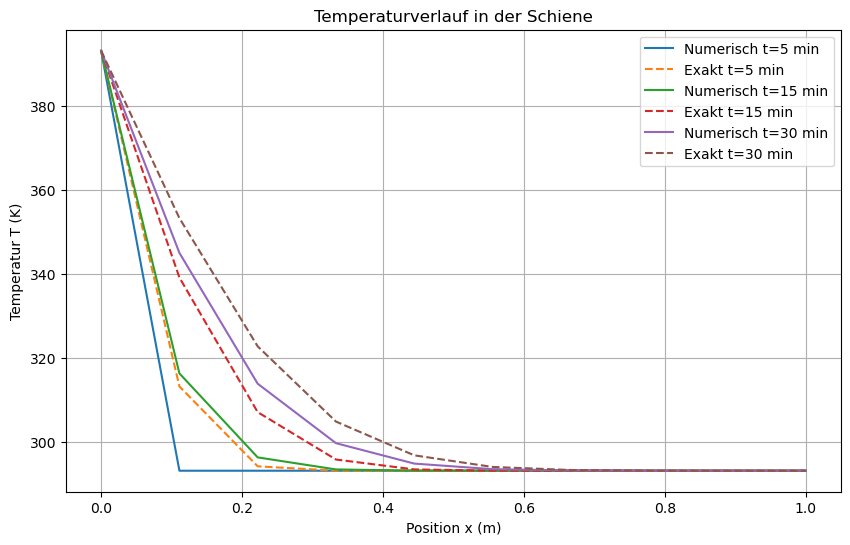

In [31]:
# Diagramm für den Vergleich
plt.figure(figsize=(10, 6))
for index, zeit in enumerate(time_steps):
    plt.plot(L_x, T_num[index], label=f'Numerisch t={zeit//60} min')
    plt.plot(L_x, T_exact[index], '--', label=f'Exakt t={zeit//60} min')

plt.xlabel('Position x (m)')
plt.ylabel('Temperatur T (K)')
plt.title('Temperaturverlauf in der Schiene')
plt.legend()
plt.grid(True)
plt.show()

### 9. Verfeinerte Diskretisierung der Schiene zur Analyse der Genauigkeit (mit N=20 Stützstellen)

In [32]:
N_fine = 20  # Neue Anzahl der Stützstellen
L_x_fine = np.linspace(0, L, N_fine)

# Initiale Temperaturverteilung für feine Diskretisierung
T_fine = np.full(N_fine, T_0)
T_fine[0] = T_S
# Berechnung der numerischen Lösung für N=20 Stützstellen bei t=15 min (900 s)
#T_num_fine = numerische_lösung(N_fine, L, T_fine, a, dt, [900])[1]  # Nur für t=900 s
T_num_fine = numerische_lösung(N_fine, L, T_fine, a, dt, time_steps)
# Exakte Lösung für t=15 min (900 s) auf beiden Diskretisierungen
T_exact_900s = T_S + (T_0 - T_S) * erf(L_x / (2 * np.sqrt(a * 900)))
T_exact_fine_900s = T_S + (T_0 - T_S) * erf(L_x_fine / (2 * np.sqrt(a * 900)))

#### Wichtig!!:
1. Eine feinere Diskretisierung reduziert den räumlichen Fehler in der numerischen Berechnung und liefert genauere Ergebnisse.
2. Der Vergleich mit der exakten Lösung zeigt, wie gut die numerische Methode die Wärmeleitung beschreibt.

### 10. Plot: Vergleich der numerischen und exakten Lösungen für beide Diskretisierungen

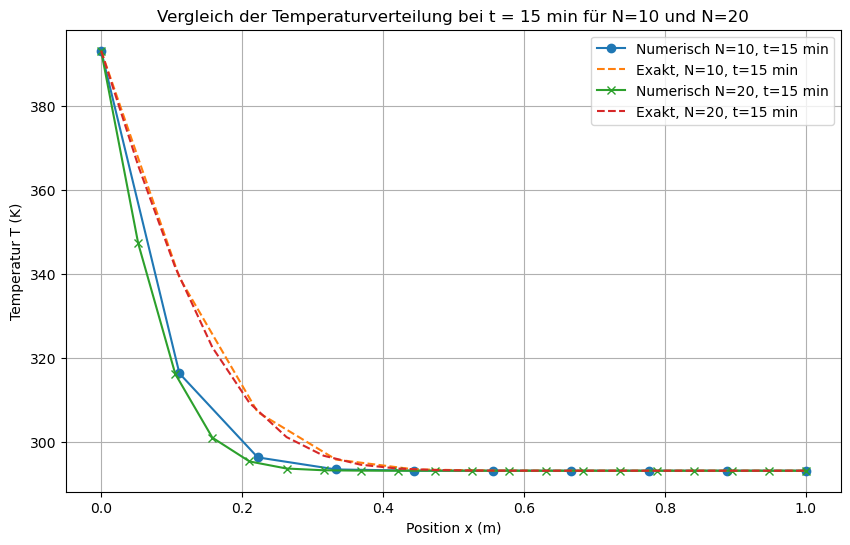

In [33]:

plt.figure(figsize=(10, 6))
plt.plot(L_x, T_num[1], 'o-', label='Numerisch N=10, t=15 min')        # Numerische Lösung für N=10
plt.plot(L_x, T_exact_900s, '--', label='Exakt, N=10, t=15 min')       # Exakte Lösung auf N=10 Diskretisierung
plt.plot(L_x_fine, T_num_fine[1], 'x-', label='Numerisch N=20, t=15 min')  # Numerische Lösung für N=20
plt.plot(L_x_fine, T_exact_fine_900s, '--', label='Exakt, N=20, t=15 min')  # Exakte Lösung auf N=20 Diskretisierung

# Diagramm-Details
plt.xlabel('Position x (m)')
plt.ylabel('Temperatur T (K)')
plt.title('Vergleich der Temperaturverteilung bei t = 15 min für N=10 und N=20')
plt.legend()
plt.grid(True)
plt.show()